In [1]:
import harpy as hp

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg

In [ ]:
import os
import uuid
import tempfile
from harpy.datasets.registry import get_registry

registry = get_registry(path = None)
# on the cluster, set path to "/staging/leuven/stg_00143/spatial_data_training/merscope", as the datasets are already there
# on Windows, set path (e.g. to r"c:\tmp")

_ = registry.fetch("transcriptomics/vizgen/mouse/Liver1Slice1/images/mosaic_DAPI_z3.tif")
_ = registry.fetch("transcriptomics/vizgen/mouse/Liver1Slice1/images/mosaic_PolyT_z3.tif")
_ = registry.fetch("transcriptomics/vizgen/mouse/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv")
path_transcripts = registry.fetch("transcriptomics/vizgen/mouse/Liver1Slice1/detected_transcripts.csv")

input_path = os.path.dirname(path_transcripts)
OUTPUT_DIR =  tempfile.gettempdir()

# takes around 7m on mac M2
sdata = hp.io.merscope(
    path=input_path,
    to_coordinate_system="global",
    z_layers=[
        3,
    ],
    backend=None,
    transcripts=True,
    mosaic_images=True,
    do_3D=False,
    z_projection=False,
    image_models_kwargs={"scale_factors": None},
    output=os.path.join( OUTPUT_DIR, f"sdata_merscope_{uuid.uuid4()}.zarr"),
    filter_gene_names=[ "blank" ]
)

In [2]:
# Alternatively. Read data from .zarr store.
#from spatialdata import read_zarr

#path_sdata = "/staging/leuven/stg_00143/spatial_data_training/merscope/sdata_merscope_full.zarr"
#sdata=read_zarr( path_sdata )
#sdata.write( ... )

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")


In [20]:
sdata=hp.im.min_max_filtering(
    sdata,
    img_layer="mouse_Liver1Slice1_z3_global",
    output_layer="min_max_filtered",
    size_min_max_filter=[ 85, 135 ],
    crd = [  20000, 25000, 20000, 25000 ],
    overwrite=True,
      )
sdata=hp.im.enhance_contrast(
    sdata,
    img_layer="min_max_filtered",
    output_layer="clahe",
    contrast_clip=[13.5, 18.5 ],
    crd = [  20000, 25000, 20000, 25000 ],
    overwrite=True,
      )

2025-04-15 10:05:10,277 - harpy.image._map - INFO - 'combine_z' is False, but not all 'z-slices' spefified in 'fn_kwargs'/'func' ({'DAPI': {'size_min_max_filter': 85}, 'PolyT': {'size_min_max_filter': 135}}/{'DAPI': <function min_max_filtering.<locals>._apply_min_max_filter at 0x14ae997ed760>, 'PolyT': <function min_max_filtering.<locals>._apply_min_max_filter at 0x14ae997ed760>}). Specifying z-slices ([0]).


2025-04-15 10:05:10,332 - harpy.image._manager - INFO - Writing results to layer 'min_max_filtered'
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
2025-04-15 10:05:13,164 - harpy.utils._io - WARNING - layer with name 'min_max_filtered' already exists. Overwriting...
/staging/leuven/stg_00143/spatial_data_tra

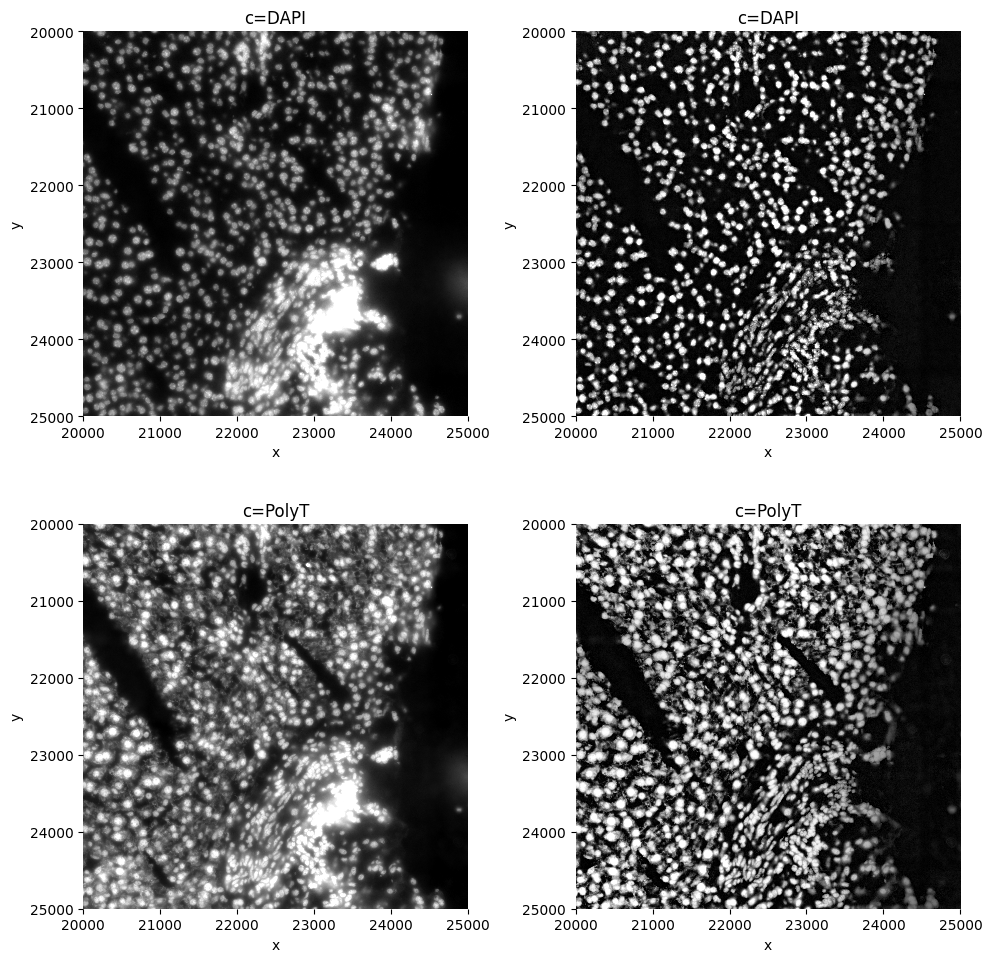

In [21]:
hp.pl.plot_shapes( 
    sdata,
    img_layer=["mouse_Liver1Slice1_z3_global", "clahe"],
    crd = [ 20000,25000,20000,25000 ],
    figsize=(10,10),
     )

In [24]:
sdata[ "clahe" ].c.data

array(['DAPI', 'PolyT'], dtype='<U5')

In [25]:
# rechunk on disk

from spatialdata.transformations import get_transformation

sdata = hp.im.add_image_layer(
    sdata,
    arr =sdata[ "clahe" ].data.rechunk( 2048 ),
    transformations=get_transformation( sdata[ "clahe"], get_all=True ),
    output_layer = "clahe",
    c_coords=sdata[ "clahe" ].c.data,
    overwrite=True,
     )

2025-04-15 10:07:30,071 - harpy.image._manager - INFO - Writing results to layer 'clahe'
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring keyword argument 'read_only'
  warn(f"ignoring keyword argument {k!r}")
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/zarr/creation.py:300: UserWarning: ignoring

In [27]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(
    n_workers=8,
    threads_per_worker=1,
    processes=True,
    memory_limit="32GB",
)

client = Client(cluster)

print(client.dashboard_link)

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42241 instead
  warnings.warn(
2025-04-15 10:07:56,903 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 32GB due to system memory limit of 26.56 GiB
2025-04-15 10:07:56,905 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 32GB due to system memory limit of 26.56 GiB
2025-04-15 10:07:56,906 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 32GB due to system memory limit of 26.56 GiB
2025-04-15 10:07:56,908 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 32GB due to system memory limit of 26.56 GiB
2025-04-15 10:07:56,909 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 32GB due to system memory limit of 26.56 GiB
2

http://127.0.0.1:42241/status


In [28]:
import torch
from cellpose import models

from harpy.image import cellpose_callable

from harpy.image._image import _get_spatial_element

se = _get_spatial_element( sdata, layer = "clahe" )

sdata = hp.im.segment(
    sdata,
    img_layer="clahe",
    chunks=None,
    depth=200,
    model=cellpose_callable,
    device="cpu",
    # parameters that will be passed to the callable _cellpose
    pretrained_model = "cyto3",
    diameter=100,
    flow_threshold=0.85,
    cellprob_threshold=-4,
    channels = [ se.c.data.tolist().index("PolyT" )+1  ,se.c.data.tolist().index("DAPI" )+1 ],
    output_labels_layer="segmentation_mask_crop",
    output_shapes_layer="segmentation_mask_boundaries_crop",
    crd= [20000, 25000, 20000, 25000],  # region to segment [x_min, xmax, y_min, y_max],
    overwrite=True,
)

client.close()

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packa

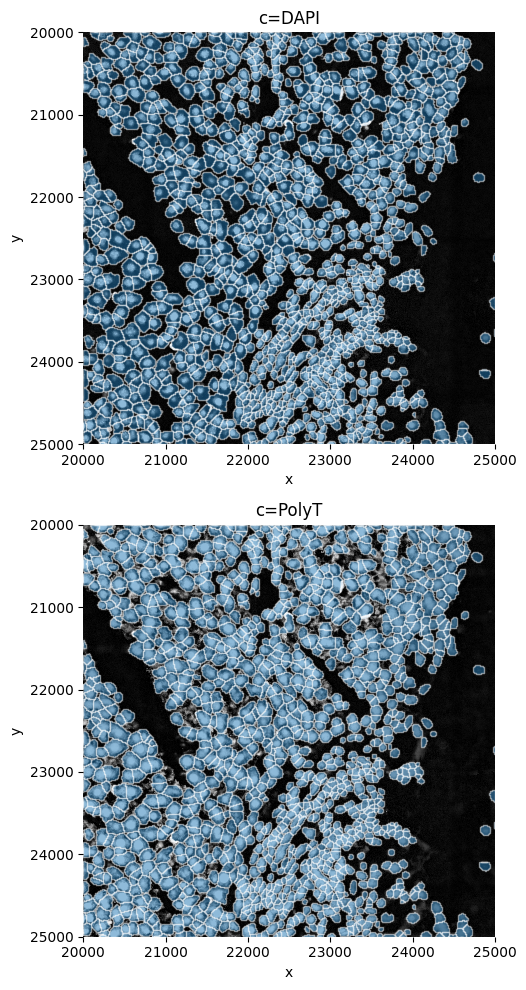

In [38]:
hp.pl.plot_shapes( sdata, shapes_layer="segmentation_mask_boundaries_crop" , img_layer=["clahe"], crd = [ 20000,25000,20000,25000 ], figsize=( 10,10 ) )

In [4]:
sdata = hp.tb.allocate(
    sdata=sdata,
    labels_layer="segmentation_mask_crop",
    points_layer="transcripts_global",
    output_layer="table_transcriptomics",
    update_shapes_layers=False,
    overwrite=True,
)

2025-04-15 10:44:30,000 - harpy.table._allocation - INFO - Calculating cell counts.
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'segmentation_mask_crop', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/staging/leuven/stg_00143/spatial_data_traini

2025-04-15 10:47:39,491 - harpy.plot._sanity - INFO - Plotting 6 transcripts.
2025-04-15 10:47:39,620 - harpy.plot._sanity - INFO - Selecting boundaries
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

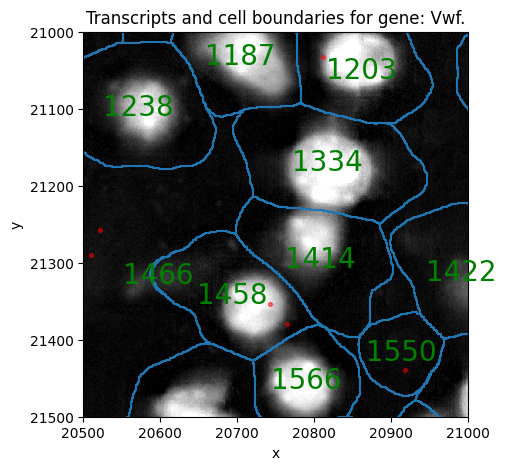

In [6]:
hp.pl.sanity(
    sdata,
    img_layer="clahe",
    shapes_layer = "segmentation_mask_boundaries_crop",
    points_layer= "transcripts_global",
    plot_cell_number=True,
    gene="Vwf",
    crd = [ 20500, 20500+500, 21000, 21500 ],
    figsize=(5,5),
)

In [8]:
sdata[ "table_transcriptomics" ][sdata[ "table_transcriptomics" ].obs[ "cell_ID" ] == 1550].to_df()["Vwf"]

cells
1550_segmentation_mask_crop_71cee4f3    1
Name: Vwf, dtype: uint32

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


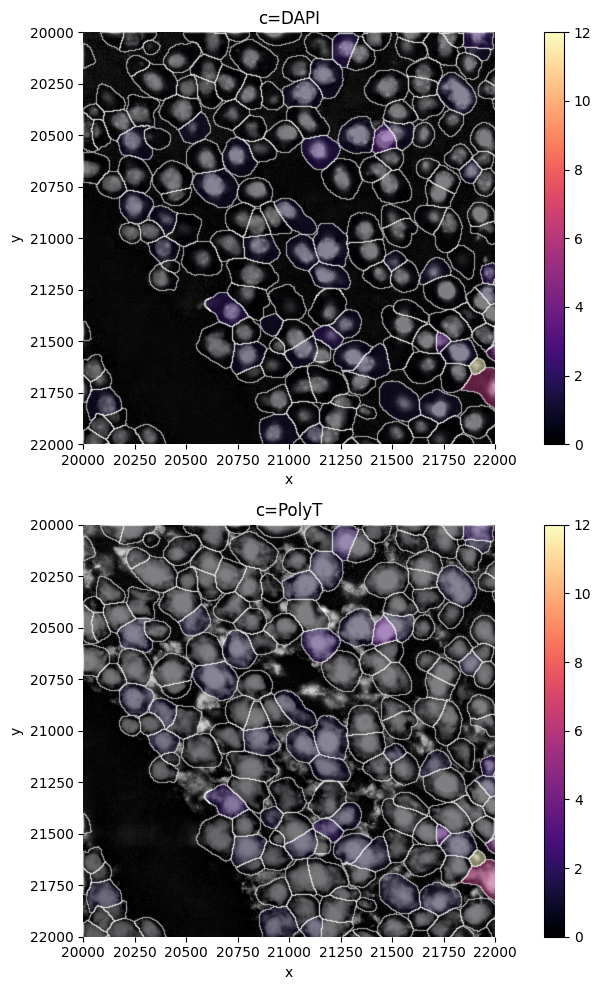

In [9]:
hp.pl.plot_shapes(
    sdata,
    img_layer="clahe",
    shapes_layer="segmentation_mask_boundaries_crop",
    figsize=( 10,10 ),
    crd = [  20000, 22000, 20000, 22000  ],
    table_layer="table_transcriptomics",
    column = "Vwf",
      )

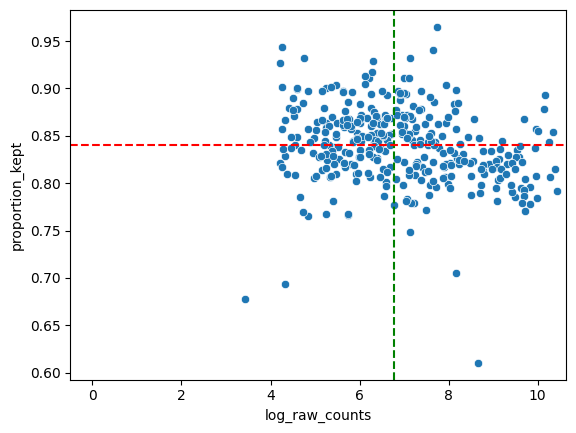

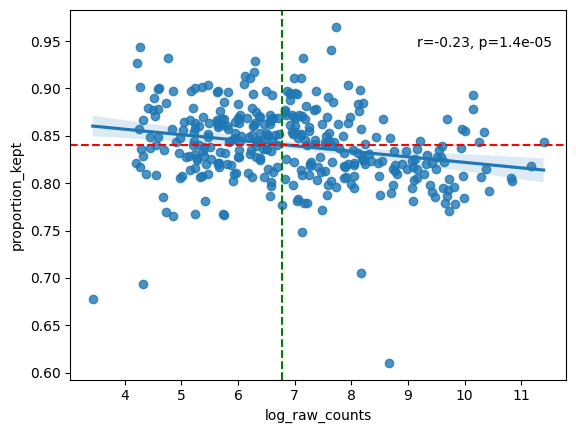

2025-04-15 10:49:26,788 - harpy.plot._transcripts - INFO - The ten genes with the highest proportion of transcripts filtered out in the region of interest ([x_min,x_max,y_min,y_max]=(20000, 25000, 20000, 25000)):
           proportion_kept  raw_counts
Dpt               0.610477        5784
Mpl               0.677419          31
Hsd3b6            0.693333          75
Sfrp1             0.705548        3515
Alas2             0.748808        1258
E2f2              0.765625         128
F13a1             0.766773         313
Cyp2b19           0.767196         189
Nes               0.767742         310
Tnfrsf13c         0.769912         113


In [11]:
df = hp.pl.analyse_genes_left_out(
    sdata,
    labels_layer="segmentation_mask_crop",
    table_layer="table_transcriptomics_crop",
    points_layer="transcripts_global",
)

In [13]:
# Perform preprocessing.
sdata = hp.tb.preprocess_transcriptomics(
    sdata,
    labels_layer="segmentation_mask_crop",
    table_layer="table_transcriptomics_crop",
    output_layer="table_transcriptomics_preprocessed_crop",  # write results to a new slot, we could also write to the same slot (when passing overwrite==True).
    min_counts=10,
    min_cells=5,
    size_norm=True,
    n_comps=50,
    overwrite=True,
    update_shapes_layers=False,
)

2025-04-15 10:49:55,149 - harpy.table._preprocess - INFO - Calculating cell size from provided labels_layer 'segmentation_mask_crop'
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/spatialdata/models/models.py:1053: UserWarning: Converting `region_key: fov_labels` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-

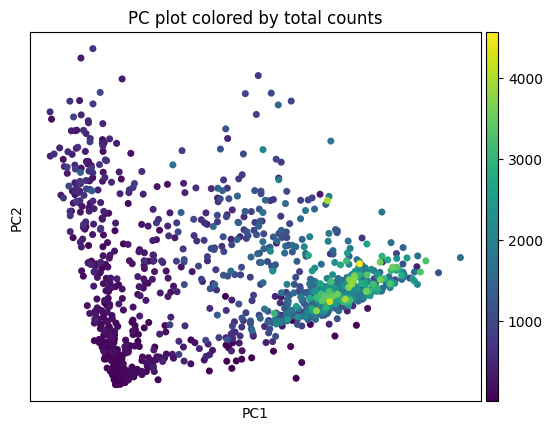

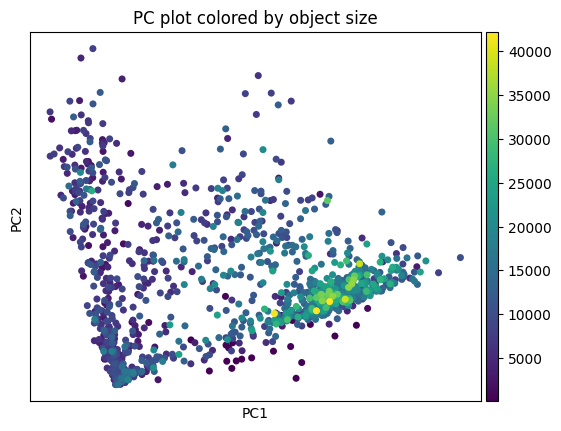

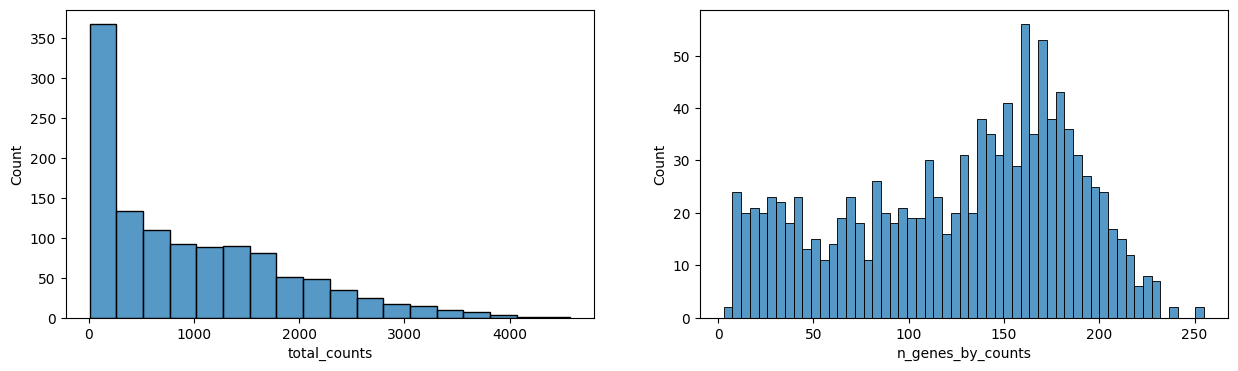

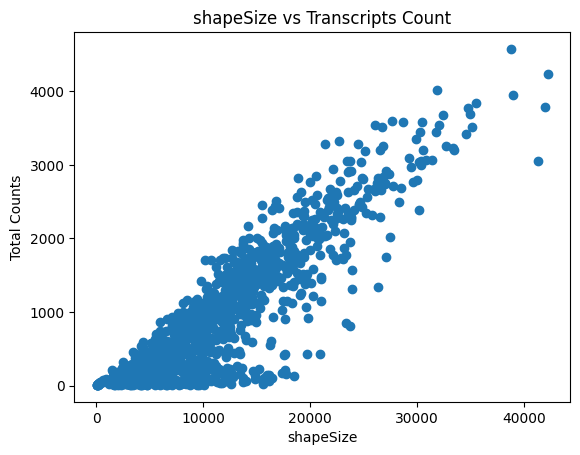

In [14]:
hp.pl.preprocess_transcriptomics(
    sdata,
    table_layer="table_transcriptomics_preprocessed_crop",
)

In [17]:
sdata = hp.tb.filter_on_size(
    sdata,
    labels_layer="segmentation_mask_crop",
    table_layer="table_transcriptomics_preprocessed_crop",
    output_layer="table_transcriptomics_filter_crop",
    min_size=500,
    max_size=100000,
    update_shapes_layers=False,
    overwrite=True,
)

/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'segmentation_mask_crop', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'segmentation_mask', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
2025-04-15 10:54:12,788 - harpy.table._table - INFO - 19 cells were filtered out based on size.


/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/harpy/table/_clustering.py:249: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, copy=False, resolution=resolution, key_added=key_added, **kwargs)
/staging/leuven/stg_00143/spatial_data_training/conda_environments/spatial_data_training_env_14_4_25/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: 

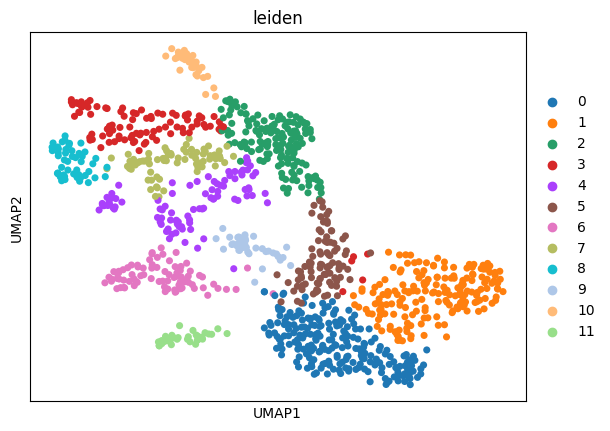

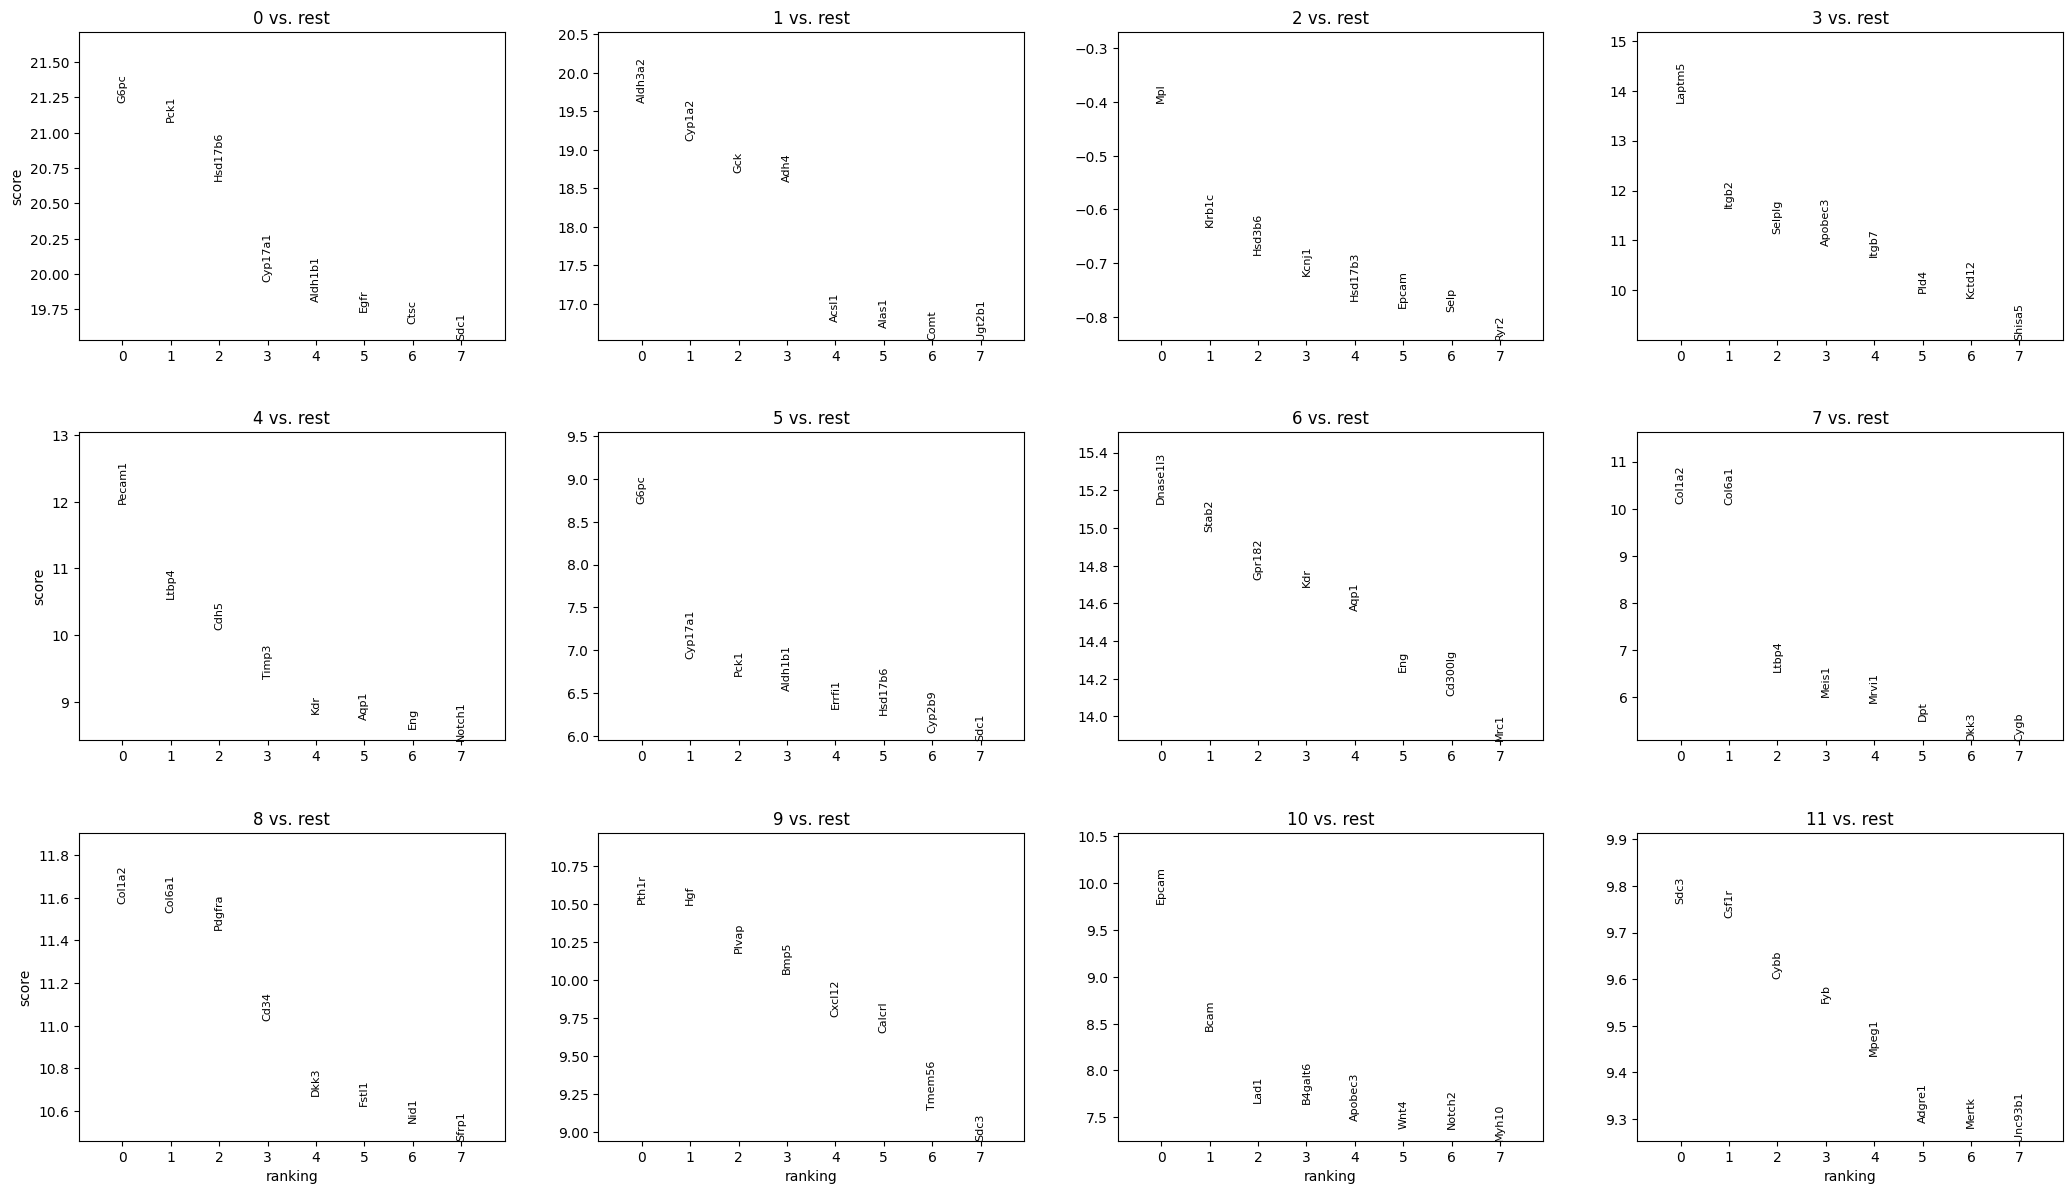

In [18]:
import scanpy as sc

sdata = hp.tb.leiden(
    sdata,
    labels_layer="segmentation_mask_crop",
    table_layer="table_transcriptomics_filter_crop",
    output_layer="table_transcriptomics_clustered_crop",
    calculate_umap=True,
    calculate_neighbors=True,
    n_pcs=17,
    n_neighbors=35,
    resolution=1.0,
    rank_genes=True,
    key_added="leiden",
    overwrite=True,
)

sc.pl.umap(sdata.tables["table_transcriptomics_clustered_crop"], color=["leiden"], show=True)
sc.pl.rank_genes_groups(sdata.tables["table_transcriptomics_clustered_crop"], n_genes=8, sharey=False, show=True)

2025-04-15 10:55:47,012 - harpy.plot._plot - WARNING - There are '149' cells in provided shapes_layer 'segmentation_mask_boundaries_crop' not found in 'sdata.tables[table_transcriptomics_clustered_crop]' (linked through 'cell_ID'), these cells will not be plotted.


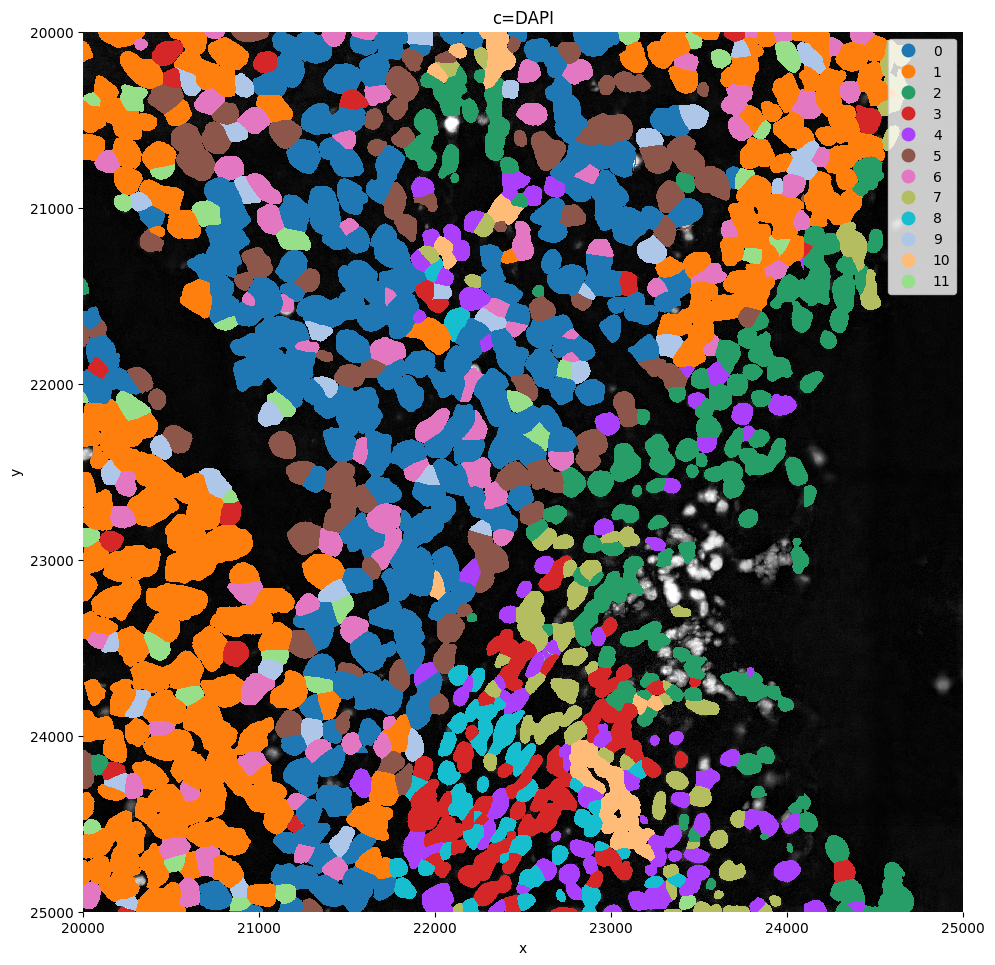

In [19]:
hp.pl.plot_shapes(
    sdata,
    img_layer="clahe",
    table_layer="table_transcriptomics_clustered_crop",
    column="leiden",
    shapes_layer="segmentation_mask_boundaries_crop",
    alpha=1,
    linewidth=0,
    channel="DAPI",
    crd = [ 20000,25000,20000,25000 ],
)

In [ ]:
#from napari_spatialdata import Interactive

#del sdata[ "table_transcriptomics_clustered"].uns[ "leiden_colors" ]

#Interactive( sdata )